#Notebook for the Github Project income-analysis-USA
Goal: A complete data analysis of census income in the US using Python with various classification algorithms.

Link: https://github.com/Letifery/income-analysis-USA\\

Authors: Adam Cisowski, Vincent Fücks

#Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import importlib 

from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Perceptron

!git clone https://github.com/Letifery/income-analysis-USA.git
%cd income-analysis-USA/utils/ 

fdp = importlib.import_module("data-preparation")
fdv = importlib.import_module("data-visualization")
fem = importlib.import_module("evaluation-measures")
fma = importlib.import_module("model-alteration")

Cloning into 'income-analysis-USA'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 83), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 55.18 KiB | 1.25 MiB/s, done.
Resolving deltas: 100% (83/83), done.
/content/income-analysis-USA/utils


# Load Adult Dataset

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep=',', header=None)
df = df.set_axis(['age', 'workclass','fnlwgt', 'education','education-num', 'marital-status','occupation', 'relationship',
                   'race', 'sex','capital-gain', 'capital-loss','hours-per-week', 'native-country','income'], axis=1, inplace=False)

# Data preparation

We first retrieve the dataset from the website and set the labels. After that, we modify our dataset using feature_selection(): 
- 1) delete the columns 'fnlwgt', 'education', 'marital-status', 'relationship' and 'race'
- 2) exclude every row  containing "?"-cells and columns which are semi-dupes (e.g. education and education-num) or useless.
-3) map the columns income and sex from strings to numbers 

We then use the factorize() function to map strings to numerical values, the resulting DataFrame looks like this: 
- age : float , workclass :  float  , education-num : float  , occupation : float,  sex : bool , capital-gain : float , capital-loss : float , hours-per-week : float , income : bool


(or one_hot_encodings() to binarize some categorical data (which isn't exactly needed for our algorithms to work but some perform better at the cost of longer runtime), returning a DataFrame with 27 columns)

In [3]:
ma = fma.ModelAlteration()
dv = fdv.data_visualization()

df = fdp.feature_selection(df)
df_fac = fdp.factorize(df)
df_fac_target = 8
df_enc = fdp.one_hot_encodings(df)
df_enc_target = 27

# Classification

We now compare various classifiers (Decision-Tree, Perceptron, kNN, Naive-Bayes and Support-Vector-Machine) on various factors to determine the best classifier for this dataset. 

Starting with this, we first use functions of the class model-alteration to determine the best hyperparameters of each classifier mentioned above (look at the documentation for detailed descriptions of each function for this class and others, we will only go briefly over them and mainly focus on the results). Each optimizer uses the function strat_kfold_evaluation() to separate the dataset into k stratified folds and then applies the respective classifier to each fold, returning the best fold with the best accuracy. This is done for each permutation of the parameter intervals and then the best combination overall (based on the best accuracy of the best folds) is returned whilst also plotting useful information.

We then report on several metrics with our functions from the class evaluation-measures, namely the confusion matrix, AUC, ROC etc., and the decision boundaries of each classifier and interpret them

Last but not least we conclude which classifier of those 5 performed best and should be used to classify new data

# **kNN-Classifier**
-----------------------

Optimize hyperparameters and plot accuracy of each fold

Epoch 1/36 | neighbours=1, metric=1, Accuracy=79.56363636363636
Epoch 2/36 | neighbours=2, metric=1, Accuracy=82.87272727272727
Epoch 3/36 | neighbours=3, metric=1, Accuracy=82.50909090909092
Epoch 4/36 | neighbours=4, metric=1, Accuracy=83.49691021446746
Epoch 5/36 | neighbours=5, metric=1, Accuracy=83.27272727272728
Epoch 6/36 | neighbours=9, metric=1, Accuracy=84.07272727272728
Epoch 7/36 | neighbours=10, metric=1, Accuracy=84.0
Epoch 8/36 | neighbours=11, metric=1, Accuracy=84.8
Epoch 9/36 | neighbours=15, metric=1, Accuracy=84.80552526354053
Epoch 10/36 | neighbours=20, metric=1, Accuracy=84.94545454545455
Epoch 11/36 | neighbours=25, metric=1, Accuracy=84.76363636363637
Epoch 12/36 | neighbours=50, metric=1, Accuracy=84.0
Epoch 13/36 | neighbours=1, metric=2, Accuracy=79.38931297709924
Epoch 14/36 | neighbours=2, metric=2, Accuracy=83.1697564521992
Epoch 15/36 | neighbours=3, metric=2, Accuracy=81.85454545454546
Epoch 16/36 | neighbours=4, metric=2, Accuracy=83.6
Epoch 17/36 | ne

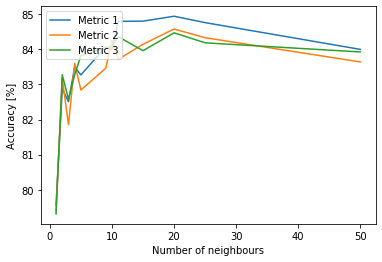

In [15]:
best_model_kNN = ma.optimize_knn(df_fac, target=df_fac_target, neighbours=([1,2,3,4,5,9,10,11,15,20,25,50]), metric=[1,2,3], folds=10)

parameters used: neighbours and different  metrics (Manhattan, Euclidean and Minkowski)

The plot shows: 
 - The Manhattan distance is slightly  better than both other distances overall 
 - The highest accuracy can generally be achieved if the number of neighbours is between 11 and 20 with a slight accuracy spike if k=10
 - If k>20, a slight decrease in accuracy can be observed

Plotting several metrics

The confusion matrix
              Positive (PP)  Negative (PN)
Positive (P)         1968.0           83.0
Negative (N)          328.0          372.0
                     
Accuracy in %    85.0
Error_rate in %  15.0


                  income <= 50K  income > 50K
Sensitivity in %          95.95         53.14
Specificity in %          53.14         95.95
Precision in %            85.71         81.76
F1 in %                   90.55         64.42




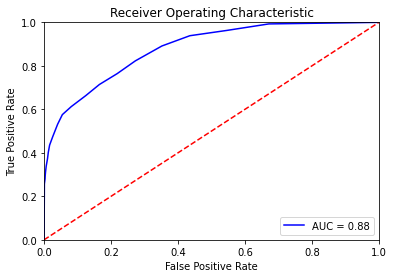

In [23]:
model = KNeighborsClassifier(**best_model_kNN[1])
Evaluation = fem.Evaluation_of_Classifier(df_fac, best_model_kNN[0], df_fac_target, model)
Evaluation.evaluate()

- The overall accuracy of 85% is one of the highest among the classifiers we used
- AUC is very high, meaning that kNN differentiates pretty good between both classes

Plot the decision boundaries (Best-Fold data was reduced to two dimensions)

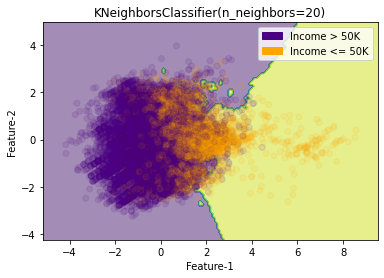

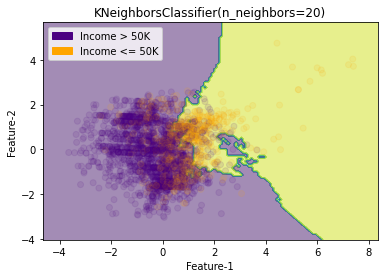

In [24]:
model = KNeighborsClassifier(**best_model_kNN[1])
dv.visualization(df_fac, best_model_kNN[0], model)

The decision-boundaries are as best as it gets for overlapping clusters; While slight overfitting occurs (the small isles around the yellow cluster ner the decision border), both clusters are nevertheless well separated, which also explains the good ROC curve

# **SVM**
----------------

Optimize hyperparameters and plot accuracy of each fold

Epoch 1/36 | regularization = 1, kernel = poly, Accuracy = 78.58181818181819
Epoch 2/36 | regularization = 2, kernel = poly, Accuracy = 79.30909090909091
Epoch 3/36 | regularization = 3, kernel = poly, Accuracy = 79.17121046892039
Epoch 4/36 | regularization = 4, kernel = poly, Accuracy = 79.2075608869502
Epoch 5/36 | regularization = 5, kernel = poly, Accuracy = 78.87272727272727
Epoch 6/36 | regularization = 9, kernel = poly, Accuracy = 79.45454545454545
Epoch 7/36 | regularization = 10, kernel = poly, Accuracy = 79.24391130498
Epoch 8/36 | regularization = 11, kernel = poly, Accuracy = 79.82551799345693
Epoch 9/36 | regularization = 15, kernel = poly, Accuracy = 79.38181818181819
Epoch 10/36 | regularization = 20, kernel = poly, Accuracy = 79.34545454545454
Epoch 11/36 | regularization = 25, kernel = poly, Accuracy = 79.52727272727273
Epoch 12/36 | regularization = 50, kernel = poly, Accuracy = 79.71646673936749
Epoch 13/36 | regularization = 1, kernel = rbf, Accuracy = 80.152671755

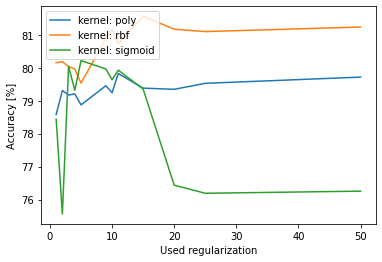

In [12]:
best_model_svm = ma.optimize_SVM(df_fac, target=df_fac_target, regularization=[1,2,3,4,5,9,10,11,15,20,25,50], kernel=[1,2,3], folds=10)

Used parameters: Kernel and penalty/regularization)

The plot shows that: 
 - The rbf kernel almost always outperformed both other kernel functions by a significant margin
 - The highest accuracy for all kernel functions can be achieved if the penalty is around ~12
 - A higher penalty than 14 results in a slight decrease in accuracy, except for the sigmoid kernel, which experienced a hefty decrease.

Plotting several metrics

The confusion matrix
              Positive (PP)  Negative (PN)
Positive (P)         2027.0           24.0
Negative (N)          483.0          216.0
                     
Accuracy in %    82.0
Error_rate in %  18.0


                  income <= 50K  income > 50K
Sensitivity in %          98.83         30.90
Specificity in %          30.90         98.83
Precision in %            80.76         90.00
F1 in %                   88.88         46.01




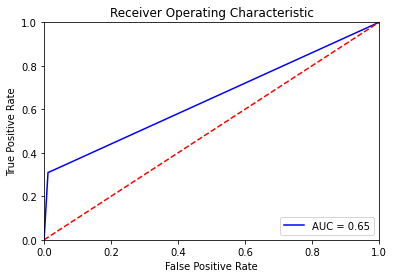

In [13]:
model = SVC(**best_model_svm[1])
Evaluation = fem.Evaluation_of_Classifier(df_fac, best_model_svm[0], df_fac_target, model)
Evaluation.evaluate()

- The AUC of 0.65 indicates that the classifier has some problems to distinguish between both classes, which renders it pretty useless against our kNN classifier, which had an AUC of 0.88

Plot the decision boundaries

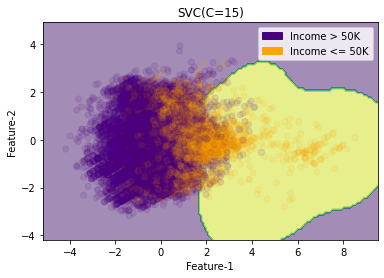

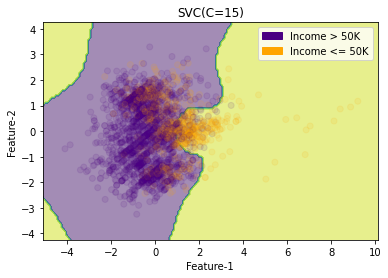

In [14]:
dv = fdv.data_visualization()
model = SVC(**best_model_svm[1])
dv.visualization(df_fac, best_model_svm[0], model)

The decision boundaries for SVM are pretty good for income>50k! But as the ROC curve and the confusion matrix already indicate, our SVM algorithm has quite big problems in recognising income <=50k, which can be seen quite well in the upper plot, where many yellow dots lie in the purple area.

# **Perceptron**
----------------

Optimize hyperparameters and plot accuracy of each fold

Epoch 1/80 | learning_rate=0.1, penalty=None, Accuracy=76.77208287895311
Epoch 2/80 | learning_rate=0.6210526315789474, penalty=None, Accuracy=78.25454545454545
Epoch 3/80 | learning_rate=1.142105263157895, penalty=None, Accuracy=78.29880043620501
Epoch 4/80 | learning_rate=1.6631578947368424, penalty=None, Accuracy=77.92727272727272
Epoch 5/80 | learning_rate=2.18421052631579, penalty=None, Accuracy=77.60000000000001
Epoch 6/80 | learning_rate=2.7052631578947373, penalty=None, Accuracy=77.89090909090909
Epoch 7/80 | learning_rate=3.2263157894736847, penalty=None, Accuracy=78.1533987640858
Epoch 8/80 | learning_rate=3.747368421052632, penalty=None, Accuracy=78.07272727272728
Epoch 9/80 | learning_rate=4.268421052631579, penalty=None, Accuracy=78.40785169029444
Epoch 10/80 | learning_rate=4.7894736842105265, penalty=None, Accuracy=77.49909123954926
Epoch 11/80 | learning_rate=5.310526315789474, penalty=None, Accuracy=78.88040712468194
Epoch 12/80 | learning_rate=5.831578947368421, penal

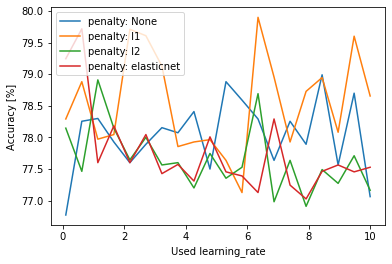

In [8]:
best_model_pc = ma.optimize_perceptron(df_fac, target=df_fac_target, learning_rate = np.linspace(0.1, 10, num=20),  penalty=[0,1,2,3], folds=10)

We used the parameters: Learning Rate and penalty/regularization)

The results show: 
 - The classifier performs slightly better with a l1 penalty whilst the learning rate doesn't seem to really affect the performance/accuracy.
 - The highest accuracy can be generally achieved if the l1 penalty and a learning rate between 3.5 and 5 is used.

Plotting several metrics

The confusion matrix
              Positive (PP)  Negative (PN)
Positive (P)         1948.0          103.0
Negative (N)          450.0          250.0
                     
Accuracy in %    80.0
Error_rate in %  20.0


                  income <= 50K  income > 50K
Sensitivity in %          94.98         35.71
Specificity in %          35.71         94.98
Precision in %            81.23         70.82
F1 in %                   87.57         47.48




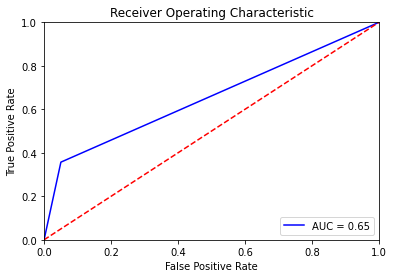

In [9]:
model = Perceptron(**best_model_pc[1])
Evaluation = fem.Evaluation_of_Classifier(df_fac, best_model_pc[0], df_fac_target, model)
Evaluation.evaluate()

Sadly again a pretty weak AUC of 0.65 (which isn't really a surprise if we look at the accuracy plot of each model)

Plot the decision boundaries

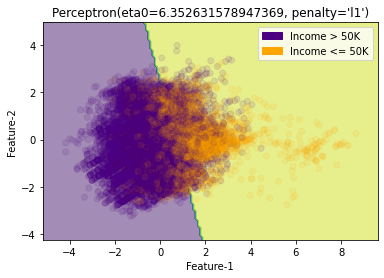

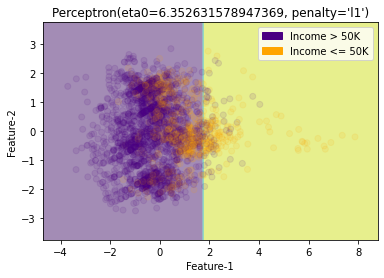

In [10]:
dv = fdv.data_visualization()
model = Perceptron(**best_model_pc[1])
dv.visualization(df_fac, best_model_pc[0], model)

The decision boundaries for the perceptron is looking pretty good at first glance, but sadly, due to its linear nature and the overlapping clusters, many points are falsely classified, which is also confirmed by the confusion-matrix

# **Decision tree**
------------------

Optimize hyperparameters and plot accuracy of each fold

Epoch 1/120 | criterion = gini, splitter = best, max_depth = 1.0, Accuracy = 79.74545454545454
Epoch 2/120 | criterion = gini, splitter = best, max_depth = 2.0, Accuracy = 79.60000000000001
Epoch 3/120 | criterion = gini, splitter = best, max_depth = 3.0, Accuracy = 80.6252271901127
Epoch 4/120 | criterion = gini, splitter = best, max_depth = 4.0, Accuracy = 82.47272727272727
Epoch 5/120 | criterion = gini, splitter = best, max_depth = 5.0, Accuracy = 83.23636363636365
Epoch 6/120 | criterion = gini, splitter = best, max_depth = 6.0, Accuracy = 84.07272727272728
Epoch 7/120 | criterion = gini, splitter = best, max_depth = 7.0, Accuracy = 84.25454545454546
Epoch 8/120 | criterion = gini, splitter = best, max_depth = 8.0, Accuracy = 84.18181818181819
Epoch 9/120 | criterion = gini, splitter = best, max_depth = 9.0, Accuracy = 84.83636363636363
Epoch 10/120 | criterion = gini, splitter = best, max_depth = 10.0, Accuracy = 84.1148673209742
Epoch 11/120 | criterion = gini, splitter = best, 

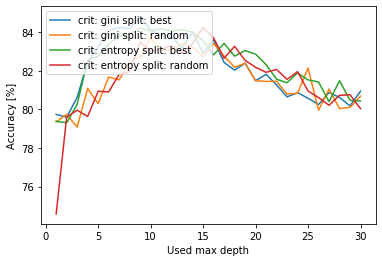

In [7]:
best_model_DT = ma.optimize_decision_tree(df_fac, target=df_fac_target, criterion = ["gini", "entropy"], max_depth = np.linspace(1, 30, num=30), splitter = ["best", "random"], folds=10)

Model parameter (Used are: criterion, splitter and max_depth)
- Looking at the plot above, we can see that gini+best and entropy+best perform better with low used max_depths and has higher peaks whilst every model performs roughly equal for higher max_depths. 

- if the max depth is over 15, all models suffers from a decreased accuracy

Plotting several metrics

The confusion matrix
              Positive (PP)  Negative (PN)
Positive (P)         1970.0           81.0
Negative (N)          337.0          362.0
                     
Accuracy in %    85.0
Error_rate in %  15.0


                  income <= 50K  income > 50K
Sensitivity in %          96.05         51.79
Specificity in %          51.79         96.05
Precision in %            85.39         81.72
F1 in %                   90.41         63.40




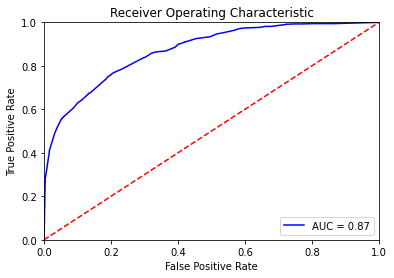

In [8]:
model = DecisionTreeClassifier(**best_model_DT[1])
Evaluation = fem.Evaluation_of_Classifier(df_fac, best_model_DT[0], df_fac_target, model)
Evaluation.evaluate()

- The overall accuracy of 85% is one of the highest among the classifiers we used
- AUC is high -> DT can differentiate pretty good


Plot the decision boundaries

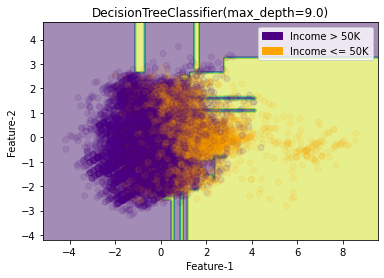

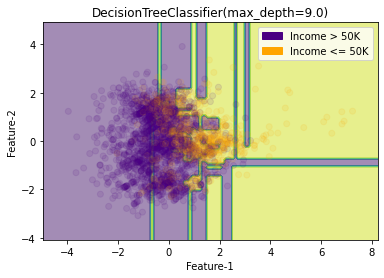

In [9]:
dv = fdv.data_visualization()
model = DecisionTreeClassifier(**best_model_DT[1])
dv.visualization(df_fac, best_model_DT[0], model)

The decision boundaries for our DT classifiers are for many datapoints (shown above) pretty good with slight overfitting. 

# **Naive bayes**
-----------------

Optimize hyperparameters and plot accuracy of each fold

Epoch 1/40 | fit_prior = True, alpha = 0.1, Accuracy = 77.57179207560887
Epoch 2/40 | fit_prior = True, alpha = 1.1473684210526316, Accuracy = 78.5090909090909
Epoch 3/40 | fit_prior = True, alpha = 2.194736842105263, Accuracy = 77.67272727272727
Epoch 4/40 | fit_prior = True, alpha = 3.2421052631578946, Accuracy = 77.52727272727272
Epoch 5/40 | fit_prior = True, alpha = 4.289473684210526, Accuracy = 77.89894583787714
Epoch 6/40 | fit_prior = True, alpha = 5.336842105263157, Accuracy = 78.07272727272728
Epoch 7/40 | fit_prior = True, alpha = 6.384210526315789, Accuracy = 77.53544165757906
Epoch 8/40 | fit_prior = True, alpha = 7.43157894736842, Accuracy = 77.35368956743002
Epoch 9/40 | fit_prior = True, alpha = 8.478947368421052, Accuracy = 77.78181818181818
Epoch 10/40 | fit_prior = True, alpha = 9.526315789473683, Accuracy = 77.41818181818182
Epoch 11/40 | fit_prior = True, alpha = 10.573684210526315, Accuracy = 77.78181818181818
Epoch 12/40 | fit_prior = True, alpha = 11.62105263157

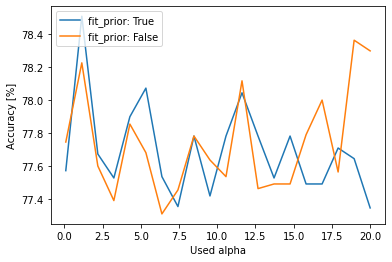

In [18]:
best_model_NB = ma.optimize_NB(df_fac, target=df_fac_target, alpha= np.linspace(0.1, 20, num=20), fit_prior = [True, False], folds=10,   plot = True)

Model parameter tuning (Used are: Alpha, Fit_prior)

- The plot shows that both parameters don't really seem to affect the performance of this classifier for our dataset. 

Plotting several metrics

The confusion matrix
              Positive (PP)  Negative (PN)
Positive (P)         1986.0           65.0
Negative (N)          526.0          173.0
                     
Accuracy in %    79.0
Error_rate in %  21.0


                  income <= 50K  income > 50K
Sensitivity in %          96.83         24.75
Specificity in %          24.75         96.83
Precision in %            79.06         72.69
F1 in %                   87.05         36.93




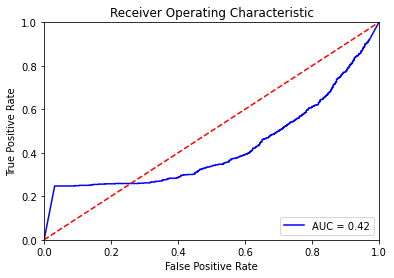

In [19]:
model = ComplementNB(**best_model_NB[1])
Evaluation = fem.Evaluation_of_Classifier(df_enc, best_model_NB[0], df_enc_target, model)
Evaluation.evaluate()

- AUC is pretty near to 0.5 so the separability of the classifier is not good, meaning that it is difficult for the classifier to distinguish between the two classes.
- The confusion matrix shows that the classifier has problems classifying negative instances; Compared to other classifiers, the performance of NB with negative class attributes is the worst of all classifiers for this dataset.  

Plot the decision boundaries

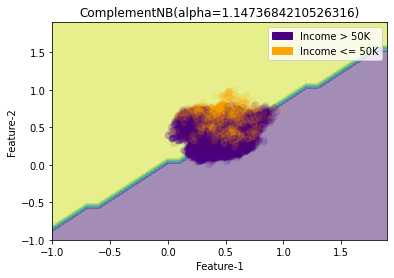

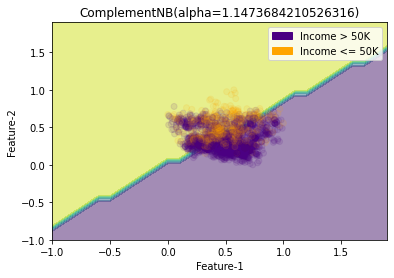

In [20]:
dv = fdv.data_visualization()
model = ComplementNB(**best_model_NB[1])
dv.visualization(df_enc, best_model_NB[0], model, True)

- The point cloud is centralized through an additional transformation of the data (since Naive Bayes can only use positive values) 
- unlike the boundary for the decision tree, is the NB boundery linear, thus can't make fine distinctions like DT, which also reflects on the accuracy of the classifier for this dataset.

##**Conclusion**
-------------

Our optimized models for the kNN and DT classifiers outperformed all other tested models. Both of them could predict, with an accuracy of roughly 85%, the target values correctly, which is pretty high in regards to the nature of the data. If we look at their decision boundaries and confusion matrices, we can see that, whilst both look pretty similar to each other, that kNN with the aforementioned optimized parameters would slightly perform better than DT for new datasets, since it has a marginally better ROC-curve and more defined decision boundaries. 